In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
pd.options.display.float_format = '{0:,.2f}'.format

national_agency_base = "https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key={myapi_key}"
violent_state_base = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/violent-crime/offense/states/"
api_key_url = "/count?api_key="
myapi_key = "FaiahkB1PpyTF7e8qEp6JZ3TnOmokQ2sW2OTU099"
states = ["AL", "AR", "CA", "CO", "DC", "DE", "FL", "HI", "ID",
          "IL", "IN", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MS", "MO",
          "MT", "NE", "NV", "NH", "NJ", "NM", "NC", "ND", "OH", "OK", "OR", "PA",
          "SC", "SD", "TN", "TX", "UT", "VT", "WA", "WV", "WI", "WY"]
state_list = []
year_list = []
offense_name_list = []
offense_count_list = []

for state in states:
    violent_state_url = violent_state_base + state + api_key_url + myapi_key 
    response = requests.get(violent_state_url).json()

    if int(response['pagination']['count'])!=0:
        for i in range(len(response['results'])):
            #print()
            if response['results'][i]['data_year'] in range(1999,2017): 
                state_list.append(state)
                year_list.append(response['results'][i]['data_year'])
                offense_name_list.append(response['results'][i]['offense_name'])
                offense_count_list.append(response['results'][i]['offense_count'])
        #print(state)
        #pprint(response)




In [14]:
FBI_data = pd.DataFrame({'State': state_list,
                         'Year': year_list,
                         'Offense': offense_name_list,
                         'Offense Count': offense_count_list
                        })

In [15]:
index = FBI_data.groupby(["State", "Year"])
offcount = FBI_data.groupby("Year")["Offense Count"].sum()
FBI_df = pd.DataFrame(index["Offense Count"].sum())
FBI_df.head()




Offense Count
State Year               
AL    2006            170
      2007            187
      2008            145
      2009            121
      2010            105

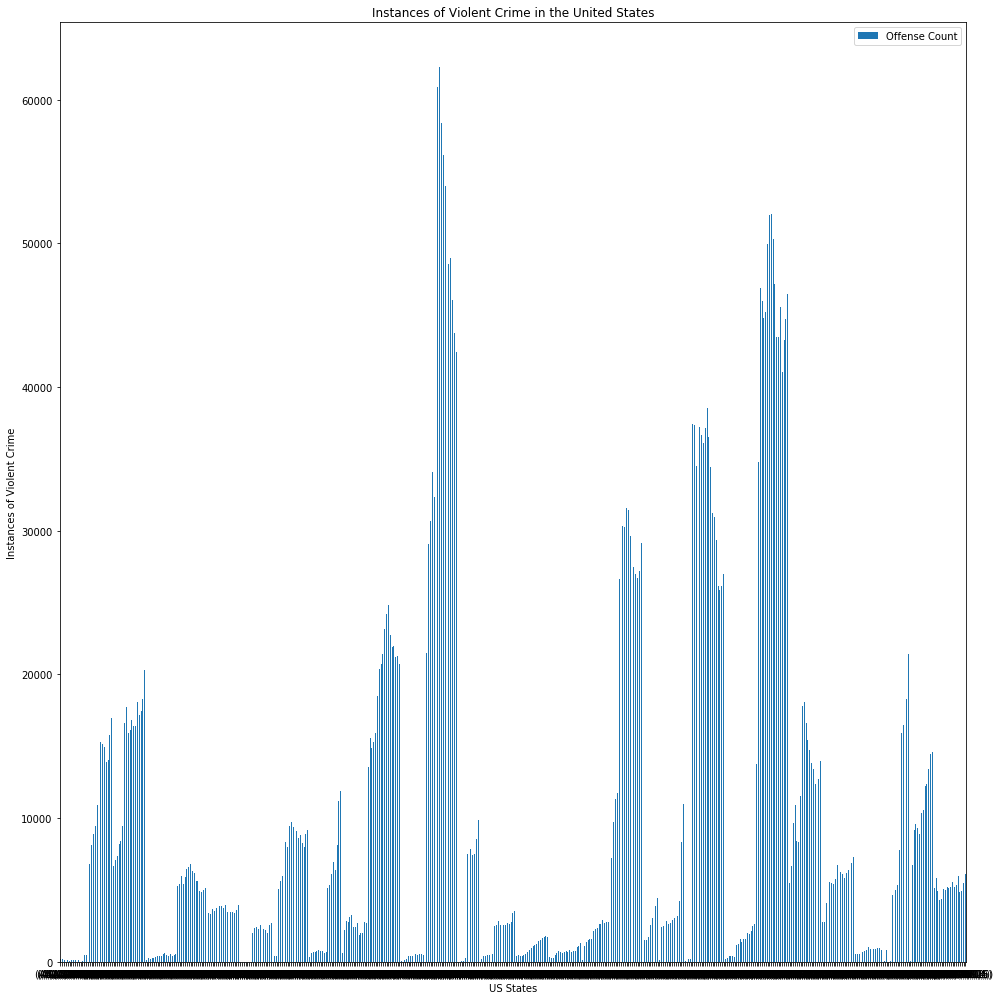

In [16]:
# Build the plots for each city 
first_graph = FBI_df.plot.bar(rot=0, subplots=True)

# Incorporate the other graph properties
plt.xlabel("US States")
plt.ylabel("Instances of Violent Crime")
plt.title("Instances of Violent Crime in the United States")
#plt.xticks(np.arange(0, 41, 5))
#plt.yticks(np.arange(20, 41, 5))
#plt.grid(b=None, which='major', axis='both')

plt.gcf().set_size_inches(14, 14)
plt.tight_layout()
# Save Figure
#plt.savefig('Instances of Violent Crime in the USA.png', bbox_inches="tight")

# Show Figure
plt.show()

In [19]:
OC_mean = FBI_df.mean()
OCYR_mean = offcount.mean()
OCYR_max = FBI_df.max()
OCYR_min = FBI_df.min()

print(OC_mean)
print(OCYR_mean)
print(OCYR_max)
print(OCYR_min)

Offense Count   9,636.07
dtype: float64
264991.94444444444
Offense Count    62276
dtype: int64
Offense Count    1
dtype: int64


In [ ]:
'''
# Setting the positions and width for the bars
pos = list(range(len(FBI_df['Year']))) 
width = 0.25 
    
# Plotting the bars
second_graph = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        FBI_df['State'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=FBI_df[0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()